# PORTFOLIOS CREATION & EVALUATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing our data obtained in the previous notebooks and parsing dates:

In [ ]:

nas100 = pd.read_csv("Data/nas100.csv", index_col = 0)
nas100.index = pd.to_datetime(nas100.index)

log_returns = pd.read_csv("Data/StocksReturns.csv", index_col = 0)
log_returns.index = pd.to_datetime(log_returns.index)

parameters = pd.read_csv('Data/parameters.csv', header = [0, 1], index_col = 0)
parameters.index = pd.to_datetime(parameters.index)

parameters

R_squared                                                    \
                ADBE       ADP      ABNB     GOOGL      GOOG      AMZN   
Date                                                                     
2013-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.527815  0.133661  0.231776  0.430441  0.444822  0.465720   
2023-12-26  0.526925  0.133988  0.231999  0.431206  0.445641  0.464812   
2023-12-27  0.525128  0.135428  0.234837  0.429003  0.443564  0.462937   
2023-12-28  0.525989  0.136386  0.232808  0.428486  0.442613  0.460116   
2023-12-29  0.522396  0.134500  0.232771  0.422466  0.435976  0.451480   

                                                    ... alpha_significativity  \
                 AMD       AEP      AMGN       ADI  ...                   FOX   
Date                                                ...                         
2013-12-31       NaN       NaN       NaN       NaN  ...                   NaN   
2014-01-02       NaN       NaN       NaN       NaN  ...                   NaN   
2014-01-03       NaN       NaN       NaN       NaN  ...                   NaN   
2014-01-06       NaN       NaN       NaN       NaN  ...                   NaN   
2014-01-07       NaN       NaN       NaN       NaN  ...                   NaN   
...              ...       ...       ...       ...  ...                   ...   
2023-12-22  0.474742  0.014408  0.053885  0.346127  ...              0.238298   
2023-12-26  0.479924  0.014546  0.053444  0.351466  ...              0.207805   
2023-12-27  0.478104  0.014584  0.053759  0.350505  ...              0.169243   
2023-12-28  0.474856  0.014489  0.052234  0.348207  ...              0.195831   
2023-12-29  0.486783  0.015208  0.050984  0.349175  ...              0.198821   

                                                                        \
               QRTEA      SRCL       WOR      STRM      ASAI      CHRS   
Date                                                                     
2013-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.722069  0.879915  0.288424  0.297431  0.803673  0.084521   
2023-12-26  0.675171  0.922242  0.301135  0.369829  0.784676  0.093728   
2023-12-27  0.571571  0.995087  0.331275  0.355408  0.645383  0.156021   
2023-12-28  0.694472  0.985948  0.341780  0.332306  0.634484  0.233252   
2023-12-29  0.696692  0.980792  0.345989  0.293415  0.691748  0.237064   

                                          
                LOGI      CHKP     LBTYA  
Date                                      
2013-12-31       NaN       NaN       NaN  
2014-01-02       NaN       NaN       NaN  
2014-01-03       NaN       NaN       NaN  
2014-01-06       NaN       NaN       NaN  
2014-01-07       NaN       NaN       NaN  
...              ...       ...       ...  
2023-12-22  0.253117  0.839426  0.313527  
2023-12-26  0.251935  0.771081  0.354195  
2023-12-27  0.228287  0.803461  0.339745  
2023-12-28  0.249644  0.917496  0.386056  
2023-12-29  0.240161  0.921239  0.429479  

[2517 rows x 1856 columns]

Drop first 180 rows because of the rolling window used for the regression:

In [ ]:
parameters = parameters.iloc[180:]

In [ ]:
start_date = parameters.index[0]
start_date

Timestamp('2014-09-18 00:00:00')

Then we align the other two dataframes to the correct starting date:

In [ ]:
log_returns = log_returns[log_returns.index >= start_date]
nas100 = nas100[nas100.index >= start_date]

Extract list of mondays in the considered period (rebalancing days) for further analysis:

In [ ]:
mondays = parameters.index[parameters.index.weekday == 0]

Computing the Sharpe ratio parameter as ratio of return to risk, to be used to build portfolios:

In [ ]:
sharpe = parameters["mean_return_real"] / parameters["variance_stock"]
sharpe.head()

,ADBE,ADP,ABNB,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,...,FOX,QRTEA,SRCL,WOR,STRM,ASAI,CHRS,LOGI,CHKP,LBTYA
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,3.023396,3.404943,NaN,1.884719,NaN,-2.430503,0.020074,6.143969,5.747084,-0.521864,...,NaN,-0.703568,0.749794,-1.500614,-3.115139,NaN,NaN,-0.327005,4.193486,-1.442560
2014-09-19,2.907564,4.112416,NaN,2.485425,NaN,-2.166595,-0.280901,7.369359,5.723736,0.617190,...,NaN,-0.322635,2.310897,-1.794271,-2.828308,NaN,NaN,-0.195716,4.035686,-0.703680
2014-09-22,3.052898,2.416644,NaN,2.290785,NaN,-2.356230,-0.481636,7.077699,5.686289,0.269253,...,NaN,-1.078164,1.435435,-2.452788,-3.004933,NaN,NaN,-0.335188,3.692415,-1.111433
2014-09-23,3.712238,2.916545,NaN,1.655429,NaN,-2.305035,-0.881835,6.690134,5.629745,0.296979,...,NaN,-1.898617,0.790717,-2.238515,-2.799503,NaN,NaN,-0.483982,3.720608,-1.784007
2014-09-24,3.789001,3.207246,NaN,1.458521,NaN,-2.268310,-0.955976,6.281889,5.316767,0.355756,...,NaN,-0.750353,-0.318833,-2.303939,-2.706971,NaN,NaN,-0.640657,4.368075,-1.209669


We import the history of nasdaq100 composition. \
It's very important to look at composition when building portfolios in order to avoid look-ahead bias:

In [ ]:
composition = pd.read_csv("Data/nas_comps.csv", index_col = 0)
composition.index = pd.to_datetime(composition.index, format = "mixed")
composition

,components
2024-07-20,"['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN..."
2024-03-18,"['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN..."
2023-12-18,"['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN..."
2023-07-17,"['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN..."
2023-06-20,"['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN..."
...,...
1995-07-05,"['ADBE', 'AMGN', 'AAPL', 'AMAT', 'ARM', 'CSCO'..."
1995-03-06,"['ADBE', 'AMGN', 'AAPL', 'AMAT', 'ARM', 'CSCO'..."
1995-02-27,"['ADBE', 'AMGN', 'AAPL', 'AMAT', 'ARM', 'CSCO'..."
1995-02-13,"['ADBE', 'AMGN', 'AAPL', 'AMAT', 'ARM', 'CSCO'..."


We define a function that is going to be used, when building portfolios, to retrieve the composition of the index at a specific point in time:

In [ ]:
import ast
def get_composition(date, df):
    closest_date = df.index[df.index <= date][-1]
    composition_string = df.loc[closest_date].values[0]
    composition_list = ast.literal_eval(composition_string)
    return composition_list

# ALPHA ANALYSIS

We define a treshold for significativity and we create a Dataframe that contains alpha parameters only when significative:

In [ ]:
# Define a treshold for significativity
treshold = 0.1
# Create a new df that contains alpha parameters only when significative
df = parameters["alpha"].where(parameters["alpha_significativity"] < treshold, np.nan)
df

,ADBE,ADP,ABNB,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,...,FOX,QRTEA,SRCL,WOR,STRM,ASAI,CHRS,LOGI,CHKP,LBTYA
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,NaN,NaN,NaN,NaN,NaN,-0.002352,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,-0.002305,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,NaN,NaN,NaN,NaN,NaN,-0.002383,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-23,NaN,NaN,NaN,NaN,NaN,-0.002366,NaN,NaN,NaN,NaN,...,NaN,-0.001061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-24,NaN,NaN,NaN,NaN,NaN,-0.002366,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.008934,NaN,NaN,NaN
2023-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.008710,NaN,NaN,NaN
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[mondays].count(axis = 1).describe()

count    436.000000
mean      16.974771
std        7.539432
min        3.000000
25%       12.000000
50%       16.000000
75%       21.000000
max       52.000000
dtype: float64

Looking at stats, we can see that there aren't enough stocks with significant alpha to build a portfolio.

# BUILD TILTED PORTFOLIOS WITH TOP 10 AND BOTTOM 10 STOCKS FOR VARIOUS PARAMETERS

We start by defining a function that will be used to buid tilted portfolios and show graphically the performance
of tited portfolios compared to the nas100 benchmark:

In [ ]:
def calculate_portfolio_performance(metric_df, log_returns, nas100, metric_name, n_stocks, composition_df):

    # We create a list of Monday dates, where we are going to rebalance portfolios
    mondays = metric_df.index[metric_df.index.weekday == 0]

    # We initialise the values of the portfolios and the entire NAS100 benchmark series already normalized to start from 100
    portfolio_top_val = [100]
    portfolio_bottom_val = [100]
    nas100_val = (nas100.Close / nas100.Close.loc[mondays[0]] * 100).loc[mondays]

    # We initialise lists to keep track of selected stocks
    top_stocks_list = []
    bottom_stocks_list = []

    for i in range(len(mondays) - 1):
        current_monday = mondays[i]
        next_monday = mondays[i + 1]

        comps = get_composition(current_monday, composition_df)
        valid_tickers = [ticker for ticker in comps if ticker in metric_df.columns]

        # We select the values of the generic parameter for the current Monday
        metric_values = metric_df.loc[current_monday, valid_tickers]

        # We identify the top and bottom stocks
        top_stocks = metric_values.nlargest(n_stocks).index
        bottom_stocks = metric_values.nsmallest(n_stocks).index

        # Adding selected stocks to list
        top_stocks_list.append((current_monday, top_stocks))
        bottom_stocks_list.append((current_monday, bottom_stocks))

        # We calculate the weekly returns of the top and bottom 10 stocks for the current week
        weekly_returns_top = log_returns.loc[current_monday:next_monday, top_stocks].sum()
        weekly_returns_bottom = log_returns.loc[current_monday:next_monday, bottom_stocks].sum()

        # We calculate the average of the weekly logarithmic returns
        mean_weekly_returns_top = weekly_returns_top.mean()
        mean_weekly_returns_bottom = weekly_returns_bottom.mean()

        # Updating the value of portfolios
        new_val_top = portfolio_top_val[-1] * np.exp(mean_weekly_returns_top)
        new_val_bottom = portfolio_bottom_val[-1] * np.exp(mean_weekly_returns_bottom)

        portfolio_top_val.append(new_val_top)
        portfolio_bottom_val.append(new_val_bottom)

    # We create a DataFrame for portfolio values
    portfolios_values = pd.DataFrame({
        'Date': mondays,
        f'Portfolio Top {n_stocks} {metric_name}': portfolio_top_val,
        f'Portfolio Bottom {n_stocks} {metric_name}': portfolio_bottom_val,
        'NAS100 Index': nas100_val
    })
    portfolios_values.set_index('Date', inplace = True)

    # We create a graph to display the results (performance of two portfolios against the benchmarck)
    plt.figure(figsize = (14, 7))
    plt.plot(portfolios_values[f'Portfolio Top {n_stocks} {metric_name}'], label = f'Portfolio Top {n_stocks} {metric_name}')
    plt.plot(portfolios_values[f'Portfolio Bottom {n_stocks} {metric_name}'], label = f'Portfolio Bottom {n_stocks} {metric_name}')
    plt.plot(portfolios_values['NAS100 Index'], label = 'NAS100 Index', linestyle = '--')
    plt.legend()
    plt.title(f'Performance of Portfolios with NAS Index Comparison based on {metric_name}')
    plt.xlabel('Date')
    plt.ylabel('Portfolios values')
    plt.show()

    # Compute some basic stats
    mean_top = portfolios_values[f'Portfolio Top {n_stocks} {metric_name}'].pct_change().mean()
    mean_bottom = portfolios_values[f'Portfolio Bottom {n_stocks} {metric_name}'].pct_change().mean()
    volatility_top = portfolios_values[f'Portfolio Top {n_stocks} {metric_name}'].pct_change().std()
    volatility_bottom = portfolios_values[f'Portfolio Bottom {n_stocks} {metric_name}'].pct_change().std()
    mean_nas = portfolios_values['NAS100 Index'].pct_change().mean()
    volatility_nas = portfolios_values['NAS100 Index'].pct_change().std()

    print(f"Mean performance Top portfolio: {mean_top:.4f}")
    print(f"Mean performance Bottom portfolio: {mean_bottom:.4f}")
    print(f"Mean performance NAS100 Index: {mean_nas:.4f}")
    print(f"Volatility Top portfolio: {volatility_top:.4f}")
    print(f"Volatility Bottom portfolio: {volatility_bottom:.4f}")
    print(f"Volatility NAS100 Index: {volatility_nas:.4f}")

    # We save selected stocks in a DataFrame for later review
    top_stocks_df = pd.DataFrame(top_stocks_list, columns = ['Date', f'Top {n_stocks} {metric_name} Stocks']).set_index('Date')
    bottom_stocks_df = pd.DataFrame(bottom_stocks_list, columns = ['Date', f'Bottom {n_stocks} {metric_name} Stocks']).set_index('Date')

    return portfolios_values, top_stocks_df, bottom_stocks_df

Then, we define a function to compute different metrics to evaluate portfolio performance for every year considered:

In [ ]:
def compute_metrics(portfolios_values):
    # Create a list of the year in the considered period
    portfolios_values['Year'] = portfolios_values.index.year

    # Dict to store results
    results = {'Year': [], 'Portfolio': [], 'Mean Yearly Return': [],
                 'Mean Yearly Volatility': [], 'Efficiency (Sharpe Ratio)': [],
                 'Max Drawdown': [], 'VaR 95%': []}

    # Iterates on each portfolio
    for portfolio in portfolios_values.columns:
        for year, yearly_data in portfolios_values.groupby('Year'):
            # Compute weekly returns
            returns = yearly_data[portfolio].pct_change().dropna()

            # Compute metrics
            mean_yearly_return = returns.mean() * 52
            yearly_volatility = returns.std() * np.sqrt(52)
            efficiency = mean_yearly_return / yearly_volatility if yearly_volatility != 0 else np.nan
            cumulative = (1 + returns).cumprod()
            max_drawdown = (cumulative / cumulative.cummax() - 1).min()
            var_95 = np.percentile(returns, 5)

            # Insert results in the dict
            results['Year'].append(year)
            results['Portfolio'].append(portfolio)
            results['Mean Yearly Return'].append(mean_yearly_return)
            results['Mean Yearly Volatility'].append(yearly_volatility)
            results['Efficiency (Sharpe Ratio)'].append(efficiency)
            results['Max Drawdown'].append(max_drawdown)
            results['VaR 95%'].append(var_95)

    results_df = pd.DataFrame(results)
    results_df = results_df.iloc[:-10]
    return results_df

We define our last function to plot the metrics obtained:

In [ ]:
def plot_grouped_bar(performance_df):
    # Define Metrics to compute
    metrics = ['Mean Yearly Return', 'Mean Yearly Volatility', 'Efficiency (Sharpe Ratio)', 'Max Drawdown', 'VaR 95%']
    portfolios = performance_df['Portfolio'].unique()
    portfolios = [p for p in portfolios if p != 'Year']
    colors = ['blue', 'orange', 'green']  # Colors for represent the 3 differents portfolios

    # We create a 2x3 layout to plot 5 subgraphs
    fig, axes = plt.subplots(3, 2, figsize = (12, 12))
    axes = axes.flatten()

    bar_width = 0.2  # Bars' width
    space_between_groups = 0.5  # Bars' spacing (different years)
    years = performance_df['Year'].unique()  # Years

    # Cycle on each metric
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # We define the centre position of each group of bars
        positions = np.arange(len(years)) * (bar_width * len(portfolios) + space_between_groups)

        for j, portfolio in enumerate(portfolios):
            # We select data for current portfolio
            data = performance_df[performance_df['Portfolio'] == portfolio].sort_values('Year')

            # We position the bars for each portfolio with a shift within the group
            ax.bar(positions + j * bar_width, data[metric], width = bar_width, label = portfolio, color = colors[j], edgecolor = 'black', linewidth = 0.8)

        # Graph settings
        ax.axhline(0, color = 'black', linewidth = 0.8)  # Zero line
        ax.set_title(metric)
        ax.set_xlabel('Anno')
        ax.set_ylabel(metric)
        ax.grid(True)

        ax.set_xticks(positions + bar_width)
        ax.set_xticklabels(years, rotation=45)

    # Remove last subplot (it's empty)
    fig.delaxes(axes[5])

    # Add one unique legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc = 'upper center', ncol = 3, fontsize = 10, bbox_to_anchor = (0.5, 1.1))

    plt.tight_layout()
    plt.show()


## R Squared

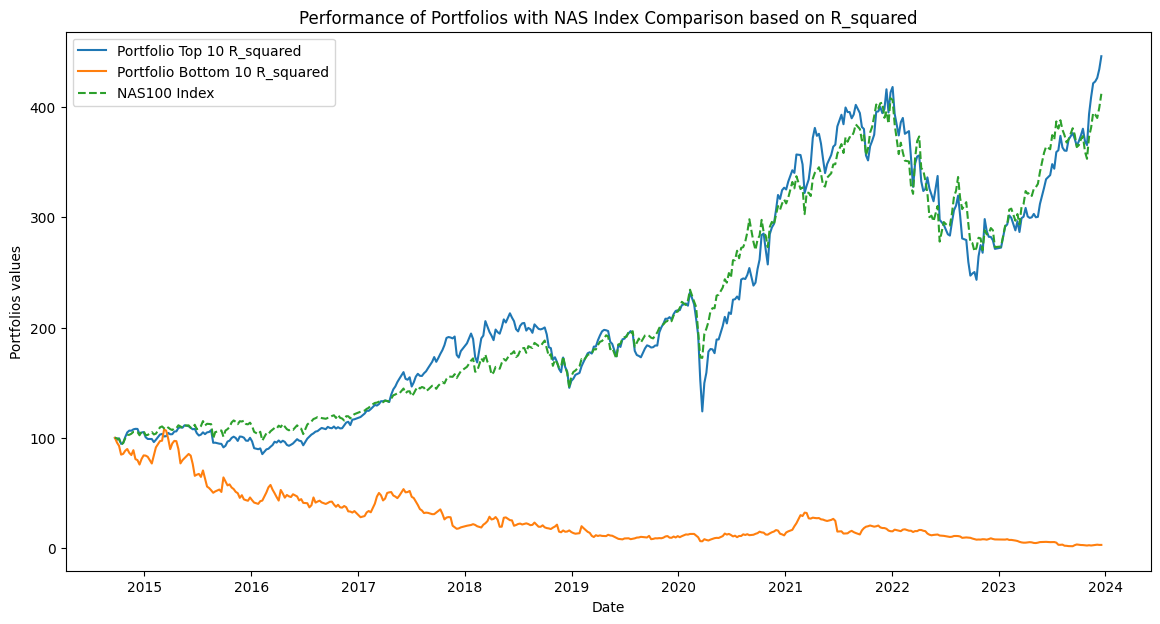

Mean performance Top portfolio: 0.0041
Mean performance Bottom portfolio: -0.0033
Mean performance NAS100 Index: 0.0037
Volatility Top portfolio: 0.0374
Volatility Bottom portfolio: 0.0980
Volatility NAS100 Index: 0.0309


In [ ]:
portfolios_values, top_stocks_df, bottom_stocks_df = calculate_portfolio_performance(parameters["R_squared"], log_returns, nas100, 'R_squared', 10, composition)

In [ ]:
# Show an example of stock selected the first monday
print("Top 10 Stocks selected first monday:", top_stocks_df.iloc[0].values)
print("Bottom 10 Stocks selected first monday:", bottom_stocks_df.iloc[0].values)

Top 10 Stocks selected first monday: [Index(['PTC', 'ADBE', 'AMGN', 'ADSK', 'PCAR', 'WOR', 'ORCL', 'CTAS', 'SYK',
        'PAYX'],
       dtype='object')                                                      ]
Bottom 10 Stocks selected first monday: [Index(['CNTO', 'MCIC', 'COMS', 'DIGI', 'DG', 'TSN', 'EA', 'AES', 'JWN',
        'COST'],
       dtype='object')                                                  ]


In [ ]:
# Application of metric function
performance_df = compute_metrics(portfolios_values)
performance_df

,Year,Portfolio,Mean Yearly Return,Mean Yearly Volatility,Efficiency (Sharpe Ratio),Max Drawdown,VaR 95%
0,2014,Portfolio Top 10 R_squared,0.209219,0.201173,1.039994,-0.050892,-0.045268
1,2015,Portfolio Top 10 R_squared,0.011395,0.184493,0.061765,-0.179590,-0.031925
2,2016,Portfolio Top 10 R_squared,0.233175,0.179373,1.299946,-0.059529,-0.036405
3,2017,Portfolio Top 10 R_squared,0.488621,0.181231,2.696123,-0.099474,-0.035495
4,2018,Portfolio Top 10 R_squared,-0.180771,0.297238,-0.608169,-0.317413,-0.059579
5,2019,Portfolio Top 10 R_squared,0.394898,0.194504,2.030284,-0.125619,-0.040716
6,2020,Portfolio Top 10 R_squared,0.581613,0.488778,1.189933,-0.465929,-0.069062
7,2021,Portfolio Top 10 R_squared,0.296573,0.227204,1.305317,-0.125328,-0.047347
8,2022,Portfolio Top 10 R_squared,-0.453468,0.335112,-1.353181,-0.382336,-0.070549
9,2023,Portfolio Top 10 R_squared,0.602259,0.186707,3.225687,-0.049888,-0.029252


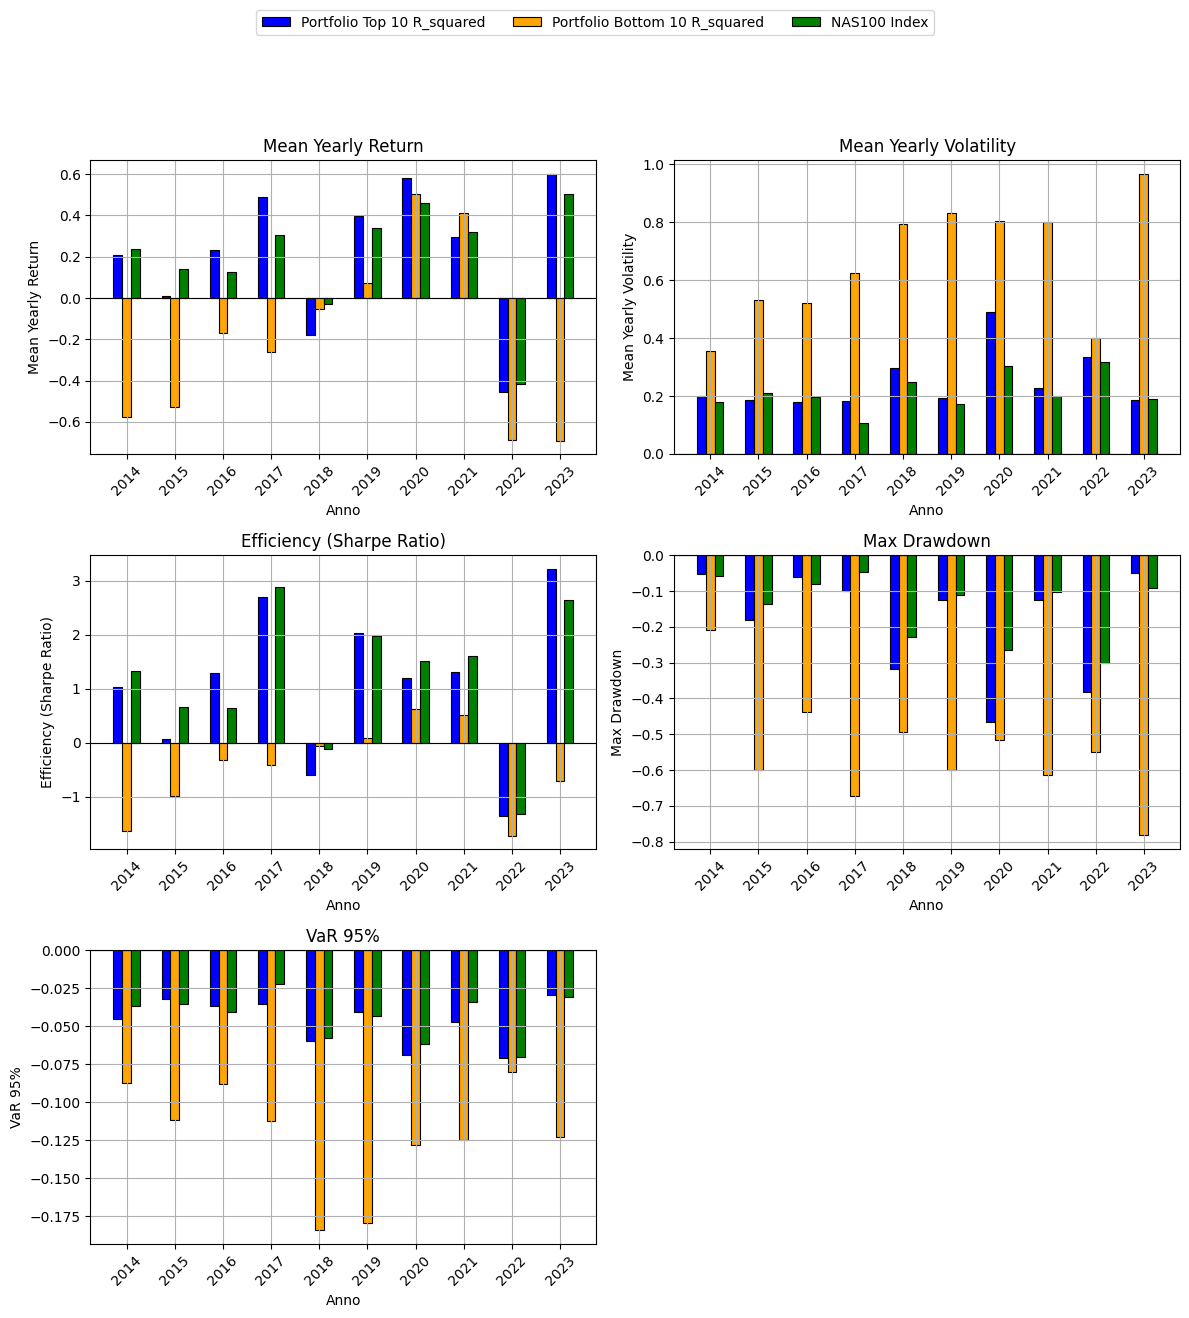

In [ ]:
# Application of plotting function
plot_grouped_bar(performance_df)

## TOTAL RISK
#### Expressed as volatility (std. dev.) of returns

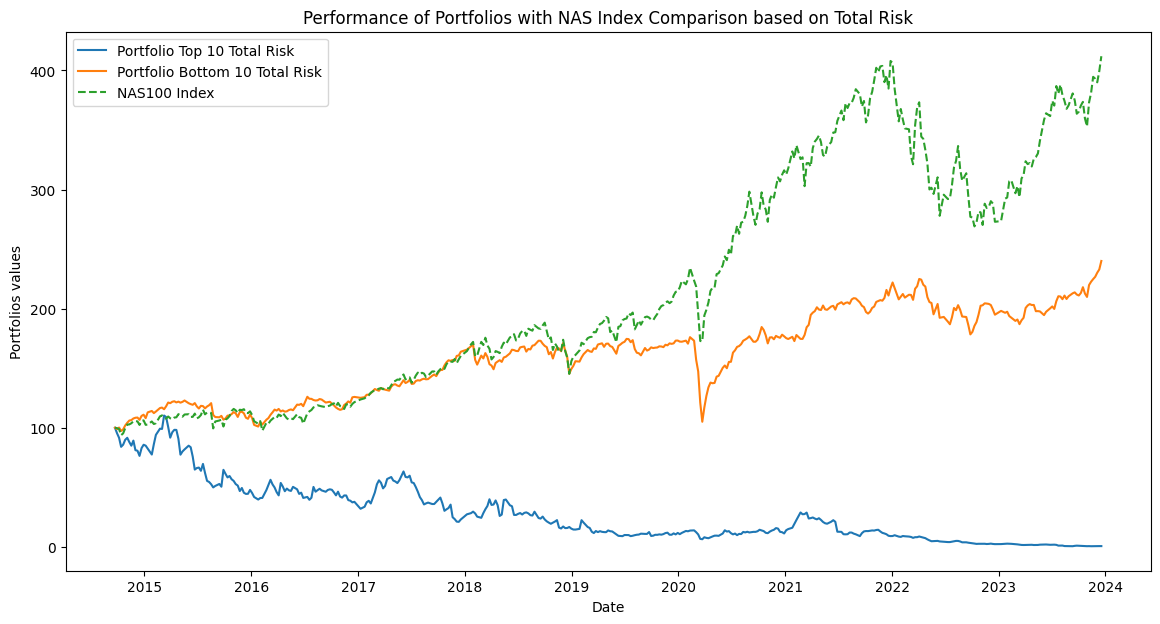

Mean performance Top portfolio: -0.0062
Mean performance Bottom portfolio: 0.0023
Mean performance NAS100 Index: 0.0037
Volatility Top portfolio: 0.1036
Volatility Bottom portfolio: 0.0243
Volatility NAS100 Index: 0.0309


In [ ]:
portfolios_values, top_stocks_df, bottom_stocks_df = calculate_portfolio_performance(parameters["variance_stock"], log_returns, nas100, 'Total Risk', 10, composition)

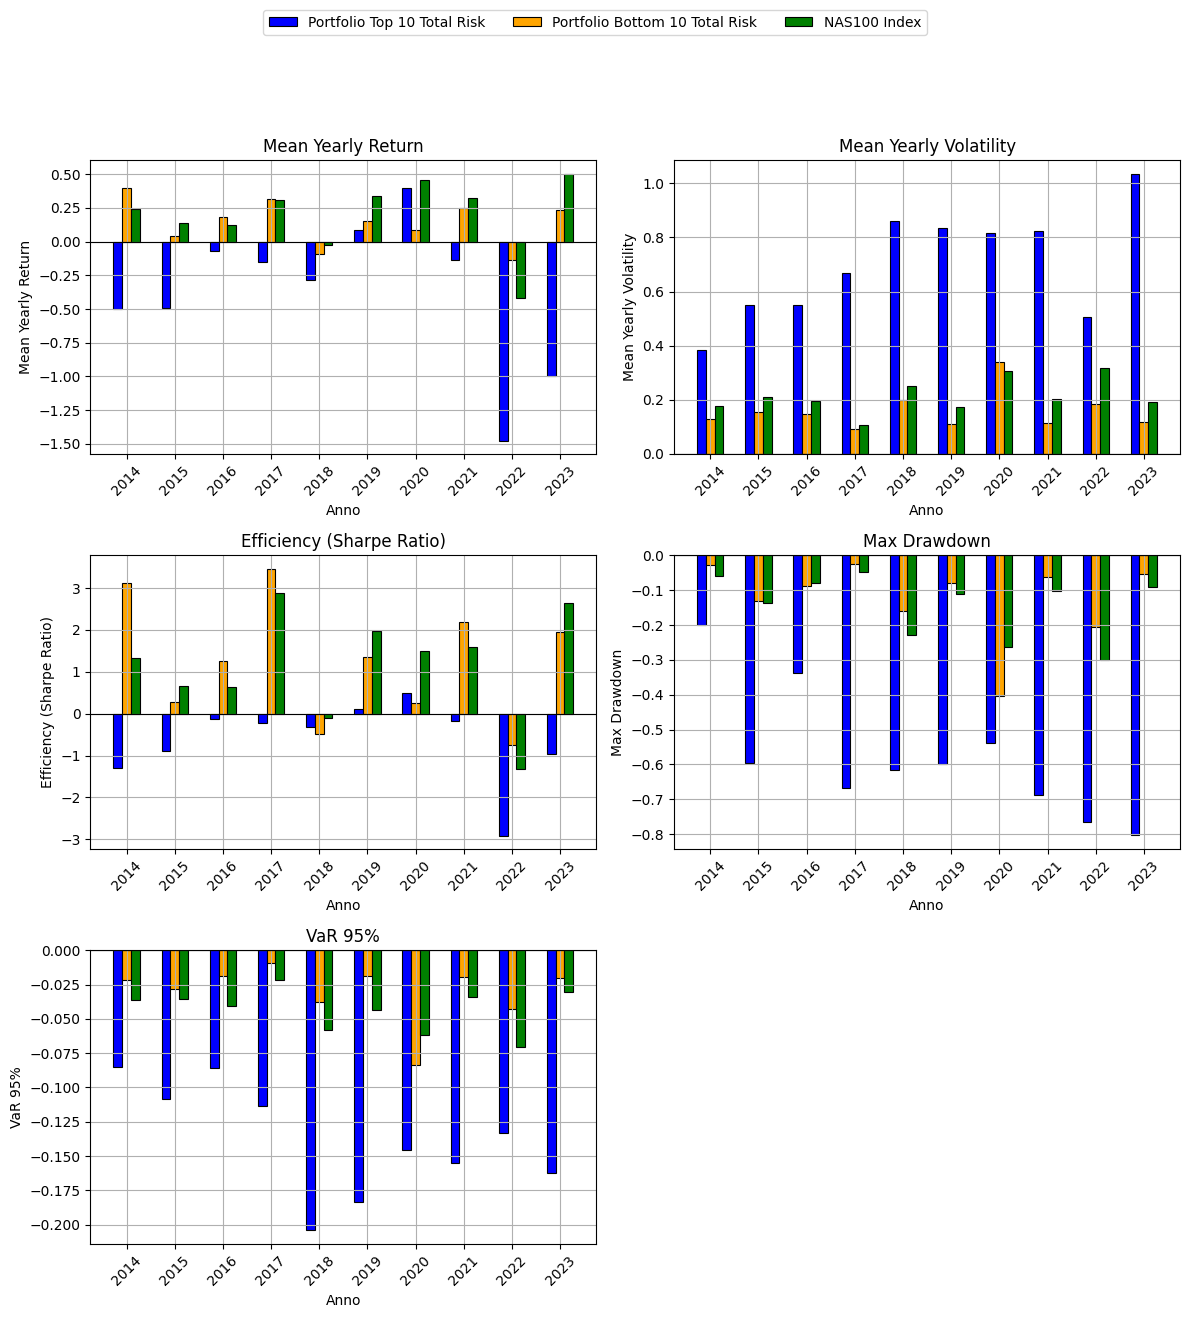

In [ ]:
performance_df = compute_metrics(portfolios_values)
plot_grouped_bar(performance_df)

## EXPECTED RETURNS

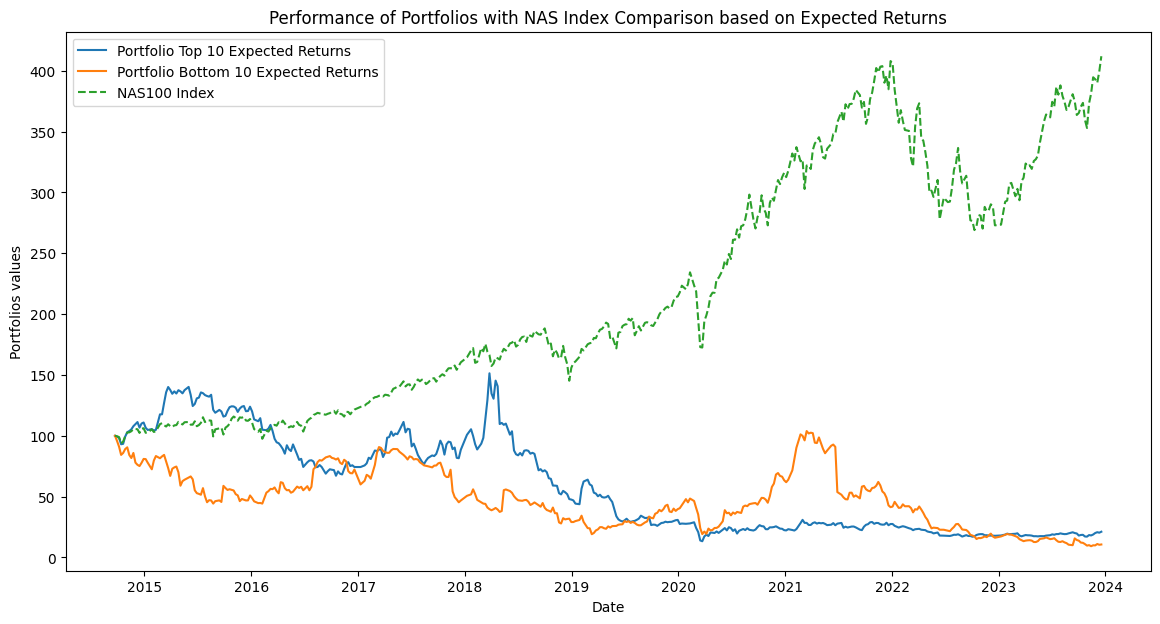

Mean performance Top portfolio: -0.0018
Mean performance Bottom portfolio: -0.0019
Mean performance NAS100 Index: 0.0037
Volatility Top portfolio: 0.0594
Volatility Bottom portfolio: 0.0813
Volatility NAS100 Index: 0.0309


In [ ]:
portfolios_values, top_stocks_df, bottom_stocks_df = calculate_portfolio_performance(parameters["mean_return_real"], log_returns, nas100, 'Expected Returns', 10, composition)

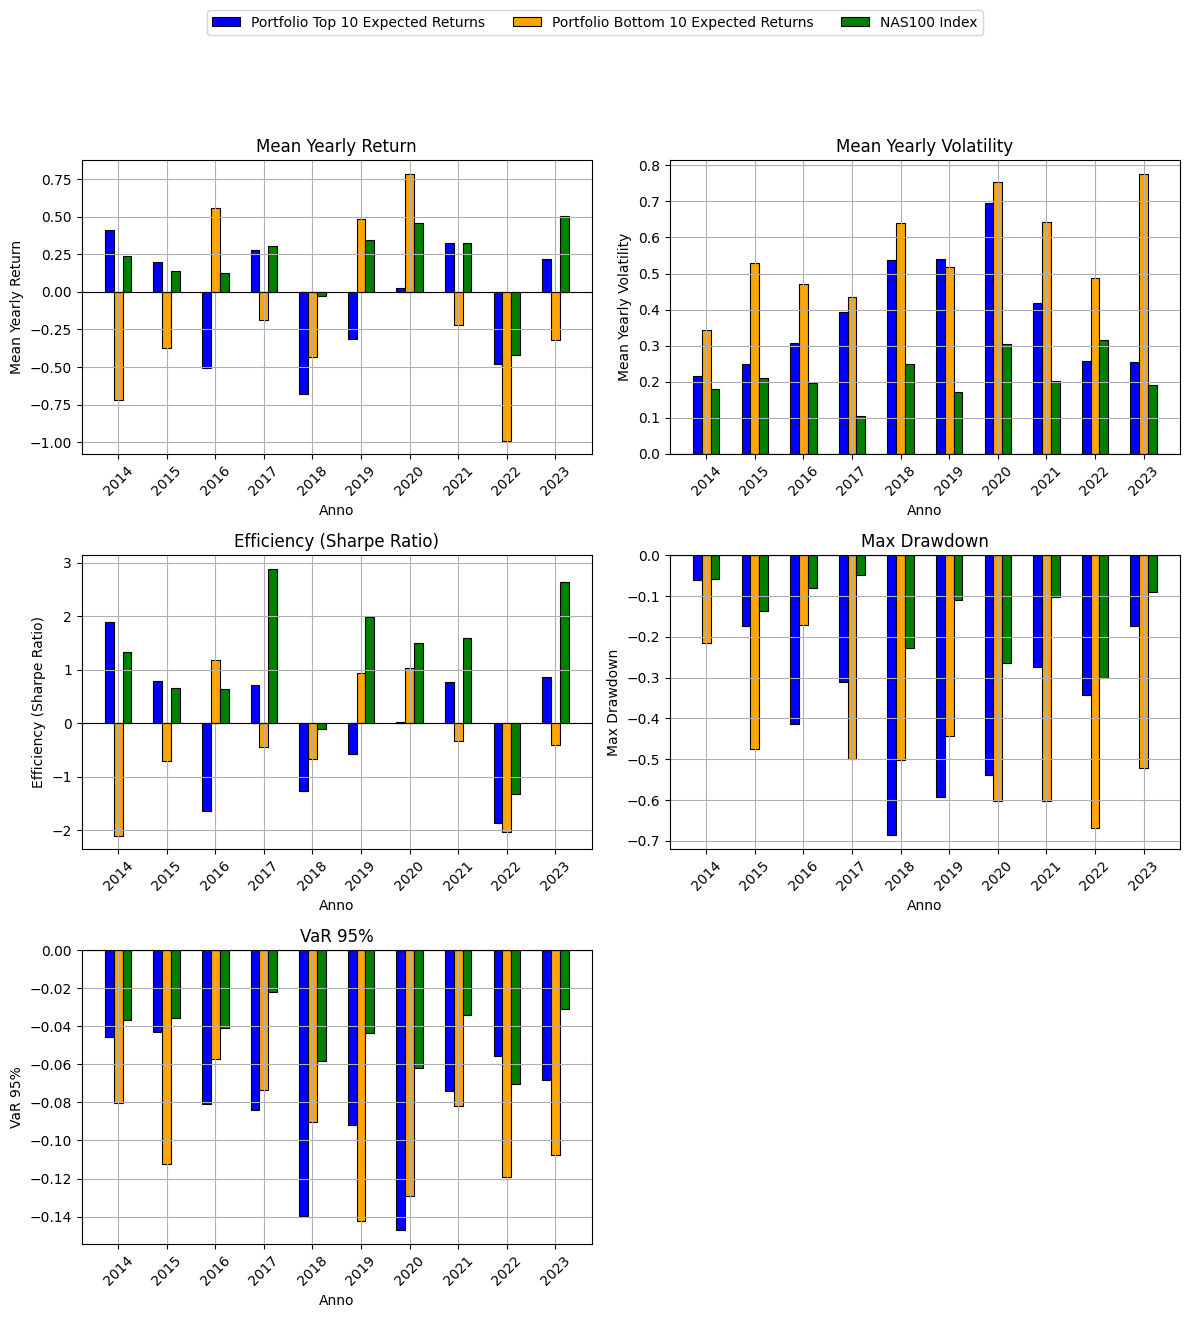

In [ ]:
performance_df = compute_metrics(portfolios_values)
plot_grouped_bar(performance_df)

## SYSTEMATIC RISK (explained variance)

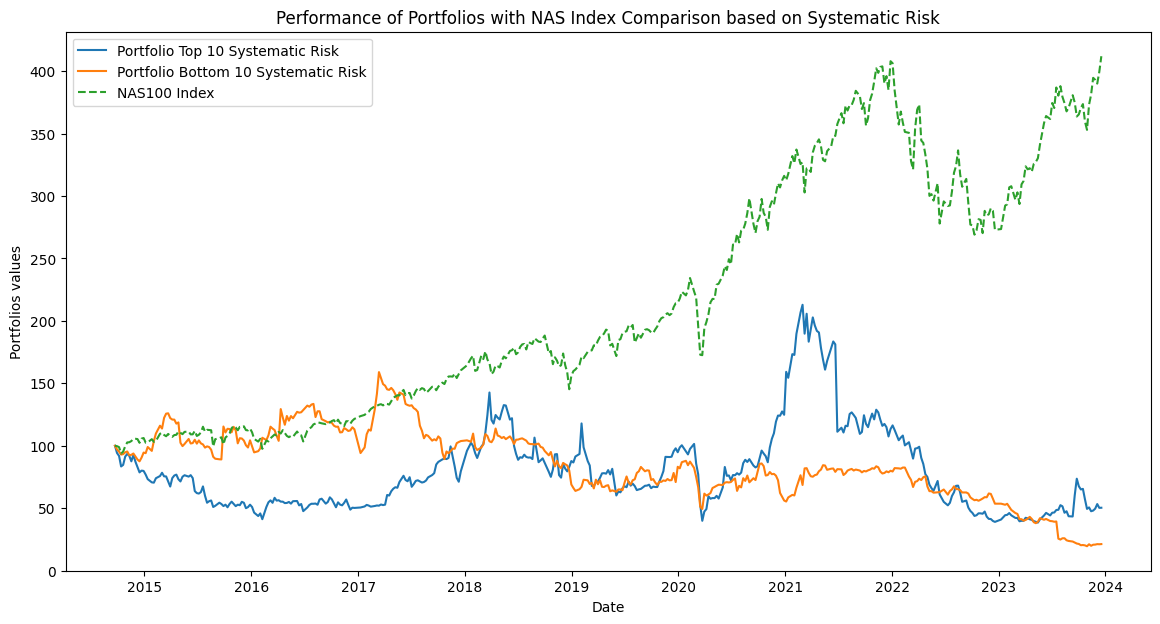

Mean performance Top portfolio: 0.0013
Mean performance Bottom portfolio: -0.0021
Mean performance NAS100 Index: 0.0037
Volatility Top portfolio: 0.0746
Volatility Bottom portfolio: 0.0533
Volatility NAS100 Index: 0.0309


In [ ]:
portfolios_values, top_stocks_df, bottom_stocks_df = calculate_portfolio_performance(parameters["beta_squared_sigma_m_squared"], log_returns, nas100, 'Systematic Risk', 10, composition)

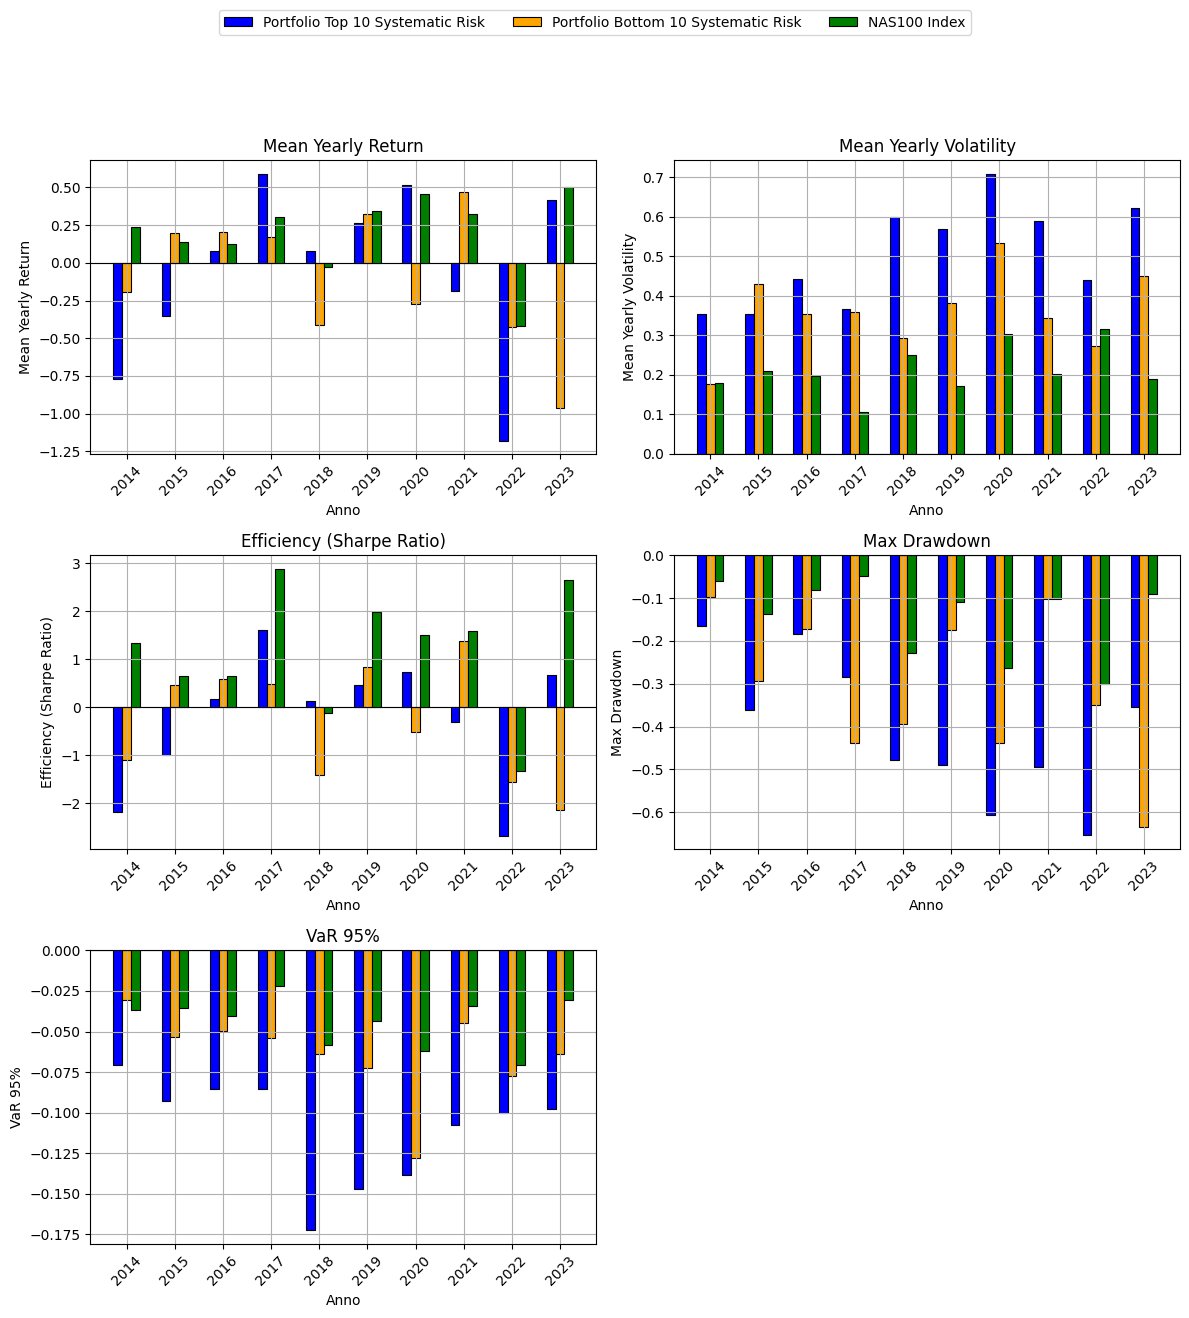

In [ ]:
performance_df = compute_metrics(portfolios_values)
plot_grouped_bar(performance_df)

## SPECIFIC RISK (residual variance)

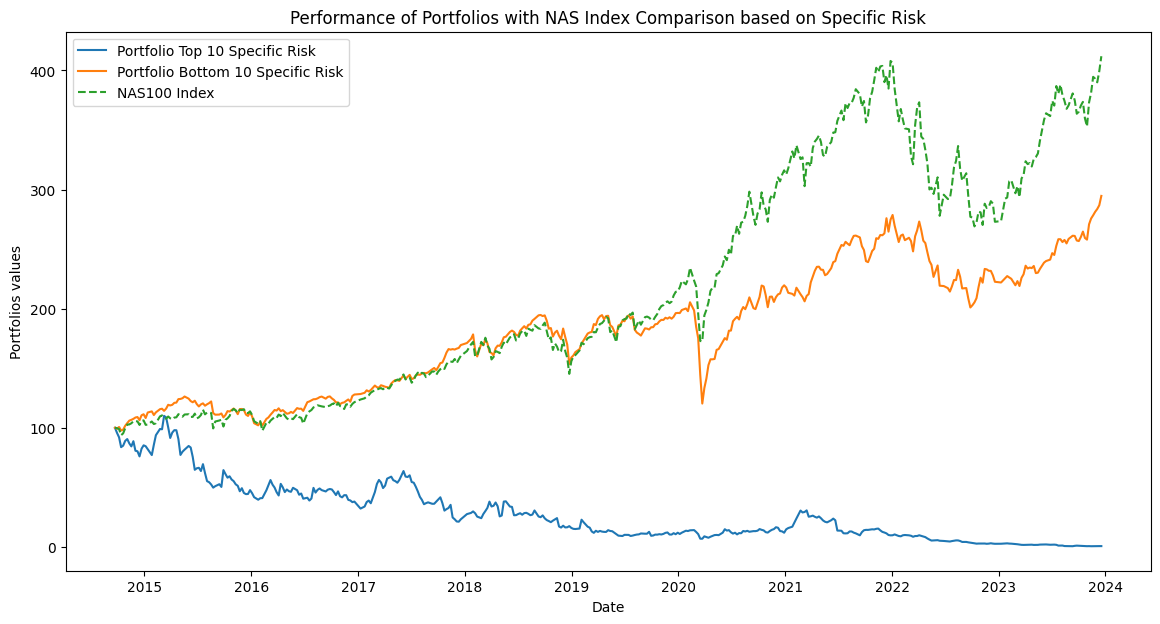

Mean performance Top portfolio: -0.0062
Mean performance Bottom portfolio: 0.0028
Mean performance NAS100 Index: 0.0037
Volatility Top portfolio: 0.1032
Volatility Bottom portfolio: 0.0263
Volatility NAS100 Index: 0.0309


In [ ]:
portfolios_values, top_stocks_df, bottom_stocks_df = calculate_portfolio_performance(parameters["variance_residual"], log_returns, nas100, 'Specific Risk', 10, composition)

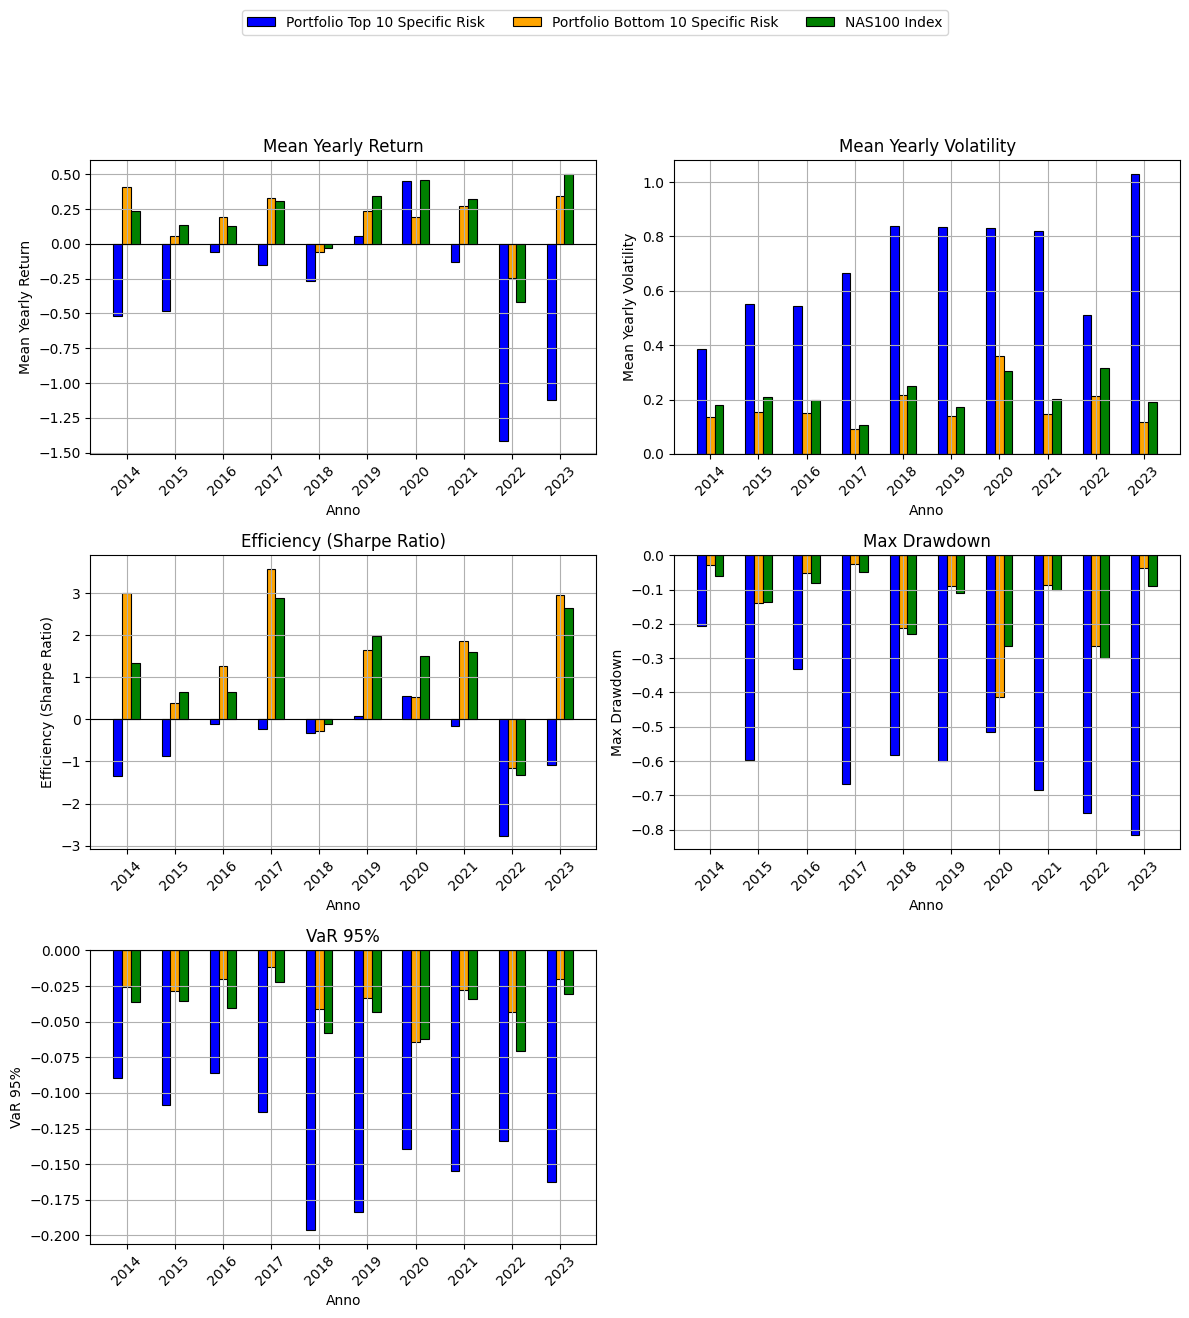

In [ ]:
performance_df = compute_metrics(portfolios_values)
plot_grouped_bar(performance_df)

## SHARPE COEFFICIENT

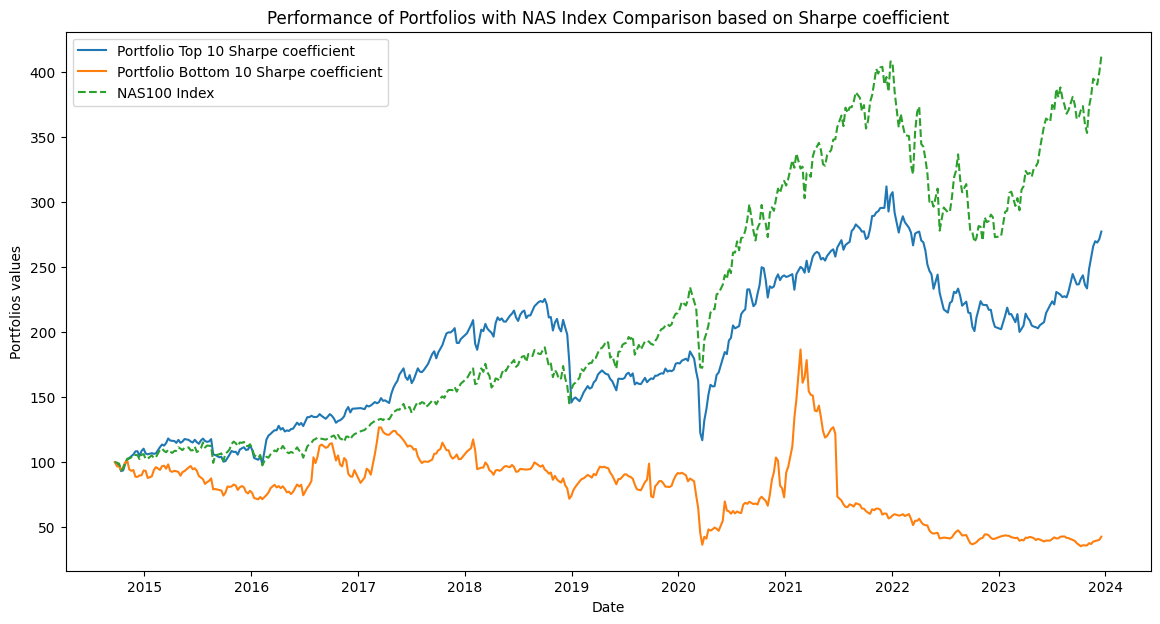

Mean performance Top portfolio: 0.0029
Mean performance Bottom portfolio: -0.0002
Mean performance NAS100 Index: 0.0037
Volatility Top portfolio: 0.0317
Volatility Bottom portfolio: 0.0589
Volatility NAS100 Index: 0.0309


In [ ]:
portfolios_values, top_stocks_df, bottom_stocks_df = calculate_portfolio_performance(sharpe, log_returns, nas100, 'Sharpe coefficient', 10, composition)

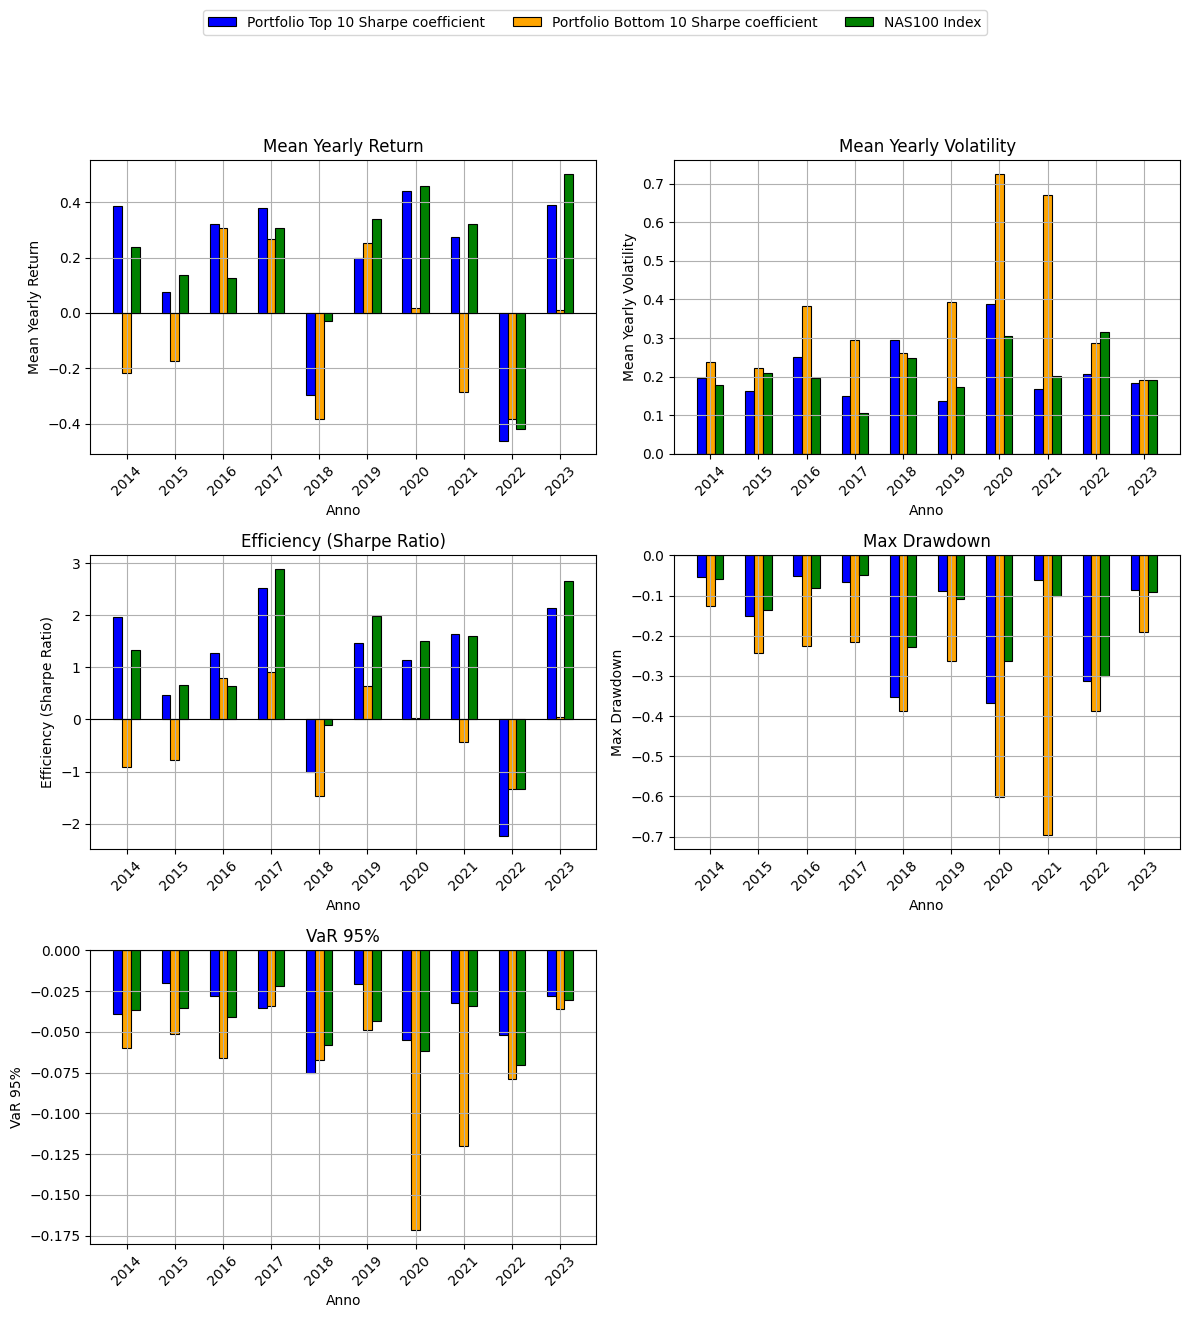

In [ ]:
performance_df = compute_metrics(portfolios_values)
plot_grouped_bar(performance_df)

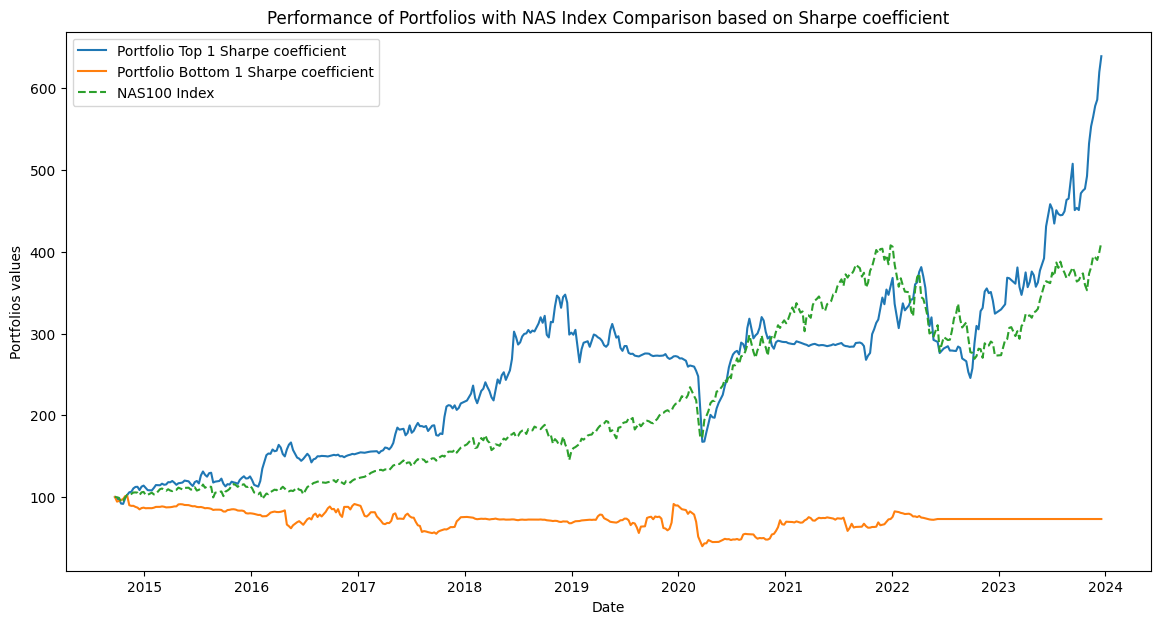

Mean performance Top portfolio: 0.0050
Mean performance Bottom portfolio: 0.0002
Mean performance NAS100 Index: 0.0037
Volatility Top portfolio: 0.0370
Volatility Bottom portfolio: 0.0428
Volatility NAS100 Index: 0.0309


In [ ]:
portfolios_values, top_stocks_df, bottom_stocks_df = calculate_portfolio_performance(sharpe, log_returns, nas100, 'Sharpe coefficient', 1, composition)